<a href="https://colab.research.google.com/github/eggtgg/bt_minhtriho_all/blob/main/k2_n3/thuat_toan/do_an/gradient_descent_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triển Khai thuật toán Gradient Descent trên tập dữ liệu giá bất động sản

**Họ và tên:** Hồ Minh Trí

**Lớp:** Khoa học dữ liệu và Trí tuệ nhân tạo

**Nguồn dữ liệu:**  https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

**Mô tả dữ liệu:** Tập dữ liệu liên quan đến những thuộc tính của các bất động sản. Phân tích các cột:
-	Id: Mã số nhận dạng cho mỗi bất động sản.
-	MSSubClass: Lớp xây dựng của bất động sản.
-	MSZoning: Phân loại khu vực (zoning) tổng quát của bất động sản.
-	LotFrontage: Chiều dài đường phố kết nối với bất động sản (theo đơn vị feet).
-	LotArea: Diện tích đất (theo đơn vị feet vuông).
-	Street: Loại đường truy cập vào bất động sản (Pave có nghĩa là đường bê tông).
-	Alley: Loại đường hẻm truy cập vào bất động sản (NA có nghĩa là không có đường hẻm truy cập).
-	LotShape: Hình dạng tổng quát của lô đất.
-	LandContour: Địa hình đất.
-	Utilities: Tiện ích công cộng (AllPub có nghĩa là tất cả các tiện ích công cộng đều có sẵn).
-	LotConfig: Cấu trúc lô đất.
-	LandSlope: Độ dốc đất.
-	Neighborhood: Khu vực lân cận.
-	…

Và SalePrice: Giá của Bất động sản tương ứng


In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/eggtgg/bt_minhtriho_all/main/k2_n3/thuat_toan/do_an/train.csv")
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
768,769,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,216837
174,175,20,RL,47.0,12416,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,184000
517,518,60,RL,79.0,10208,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,265000
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Family,82500
526,527,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,132000
989,990,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,197000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
552,553,20,RL,87.0,11146,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,255500
1212,1213,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,113000
1157,1158,120,RL,34.0,5001,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,230000


Ở đây để phục vụ cho bài toán đơn biến ta chỉ xét một trường dữ liệu duy nhất đó chính là **diện tích đất** của bất động sản sẽ ảnh hướng đến **giá của bất động** sản như thế nào. Dựa trên Cột **LotArea**(Diện tích bất động sản) và **SalePrice** (Giá của bất động sản)

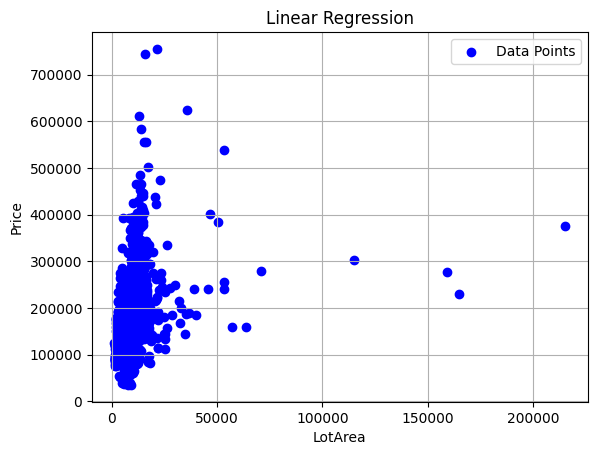

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Tập dữ liệu
X = np.array(df["LotArea"])
Y = np.array(df["SalePrice"])

# Vẽ biểu đồ tập dữ liệu
plt.scatter(X, Y, color='blue', label='Data Points')

# Tính dự đoán với giá trị tối ưu của m và b
m = 2
b = 1
Y_pred = m * X + b

# Vẽ biểu đồ hồi quy

plt.xlabel('LotArea')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


**Nhận thấy** sự phân bố của giá bất động sản dựa trên diện tích đất có các điểm dữ liệu bị nhiễu, đặc biệt ở bất động sản có diện tích cao. Tiến hành lọc lấy những điểm dữ liệu có diện tích **dưới 15000 feet vuông**.

In [ ]:
df["LotArea"]

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [ ]:
df_2 = df[df["LotArea"]<15000]

Sau khi lọc ra những bất động sản có diện tích **dưới 15000 feet vuông** nhận thấy bắt đầu có sự tương quan giữa **Diện tích** đất và **Giá bất động sản**.

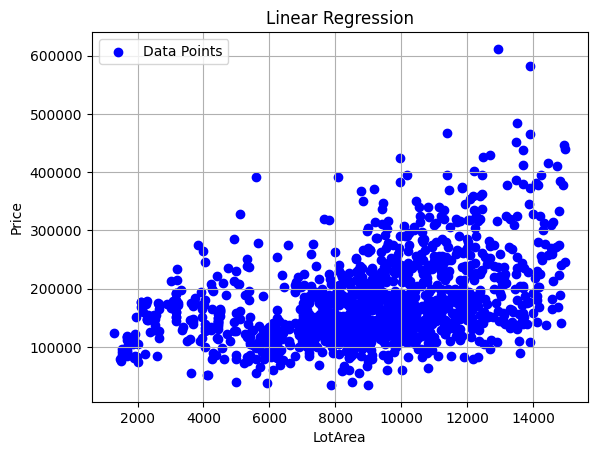

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tập dữ liệu
X = np.array(df_2["LotArea"])
Y = np.array(df_2["SalePrice"])

# Vẽ biểu đồ tập dữ liệu
plt.scatter(X, Y, color='blue', label='Data Points')

# Tính dự đoán với giá trị tối ưu của m và b
m = 2
b = 1
Y_pred = m * X + b

# Vẽ biểu đồ hồi quy

plt.xlabel('LotArea')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


**Giải quyết bài toán bằng python**

**Ta tìm được phương trình hồi quy tương ứng:**

- **SalePrice** = 0.06467567 + 0.31580393 * LotArea


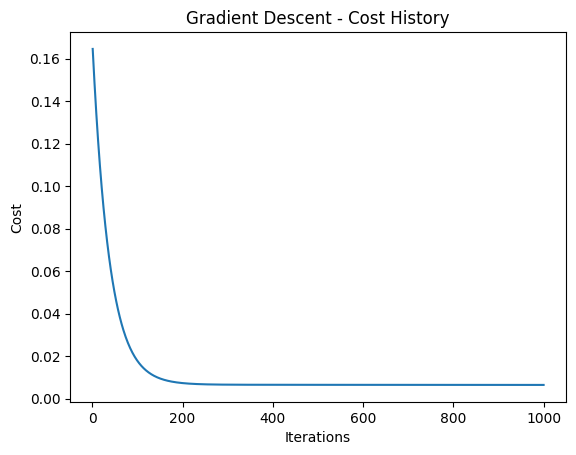

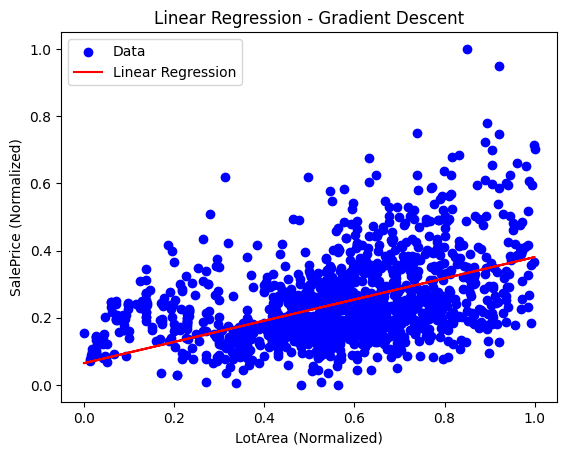

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu LotArea và SalePrice (ví dụ)
LotArea = np.array(df_2["LotArea"])
SalePrice = np.array(df_2["SalePrice"])

# Chuẩn hóa dữ liệu (phạm vi từ 0 đến 1)
LotArea_normalized = (LotArea - LotArea.min()) / (LotArea.max() - LotArea.min())
SalePrice_normalized = (SalePrice - SalePrice.min()) / (SalePrice.max() - SalePrice.min())

# Số lượng mẫu và learning rate
m = len(LotArea_normalized)
learning_rate = 0.01

# Thêm cột x0 = 1 vào ma trận LotArea_normalized để tính intercept
X = np.c_[np.ones(m), LotArea_normalized]

# Khởi tạo ngẫu nhiên các tham số m và b
theta = np.random.rand(2)

# Hàm giả thiết
def hypothesis(X, theta):
    return X.dot(theta)

# Hàm mất mát (mean squared error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

# Thực hiện gradient descent
num_iterations = 1000
theta_final, cost_history = gradient_descent(X, SalePrice_normalized, theta, learning_rate, num_iterations)

# Trực quan hóa kết quả
plt.plot(range(1, num_iterations+1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent - Cost History')
plt.show()

# Vẽ đường thẳng hồi quy trên dữ liệu chuẩn hóa
plt.scatter(LotArea_normalized, SalePrice_normalized, color='blue', label='Data')
plt.plot(LotArea_normalized, hypothesis(X, theta_final), color='red', label='Linear Regression')
plt.xlabel('LotArea (Normalized)')
plt.ylabel('SalePrice (Normalized)')
plt.title('Linear Regression - Gradient Descent')
plt.legend()
plt.show()


In [ ]:
theta_final

array([0.06467567, 0.31580393])